# Dados Enviesados e Machine Learning

In [35]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np

dataset = pd.read_csv("house_prices.csv")

In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Estatísticas básicas da população

#### Prediction

Vamos avaliar o preço da casa a partir do parâmetro da metragem da casa

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

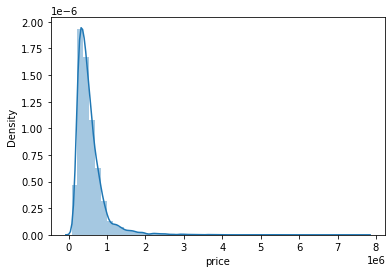

In [8]:
sns.distplot(dataset['price'])

Não é um tipo de distribuição normal para o valor das casas, nesse caso é a gama. Para isso temos que transformar para distribuição normal

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

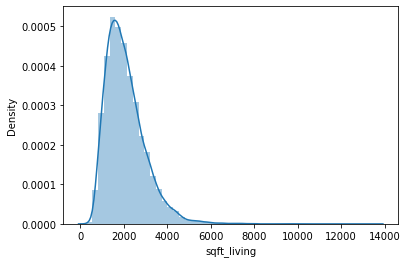

In [9]:
sns.distplot(dataset['sqft_living'])

Também não é uma distribuição normal para a area das casas, tipo de distribuição é a gama. Para isso vamos transformar para a normal.

## Sem tratamento de dados

Vamos fazer a avaliação do modelo de machine learning a partir do momento que não mudamos o tipo de distribuição.

In [15]:
from sklearn.linear_model import LinearRegression

In [17]:
X = dataset['sqft_living'].values # Metragem quadrada da casa
X

array([1180, 2570,  770, ..., 1020, 1600, 1020], dtype=int64)

In [18]:
X.shape # formato vetor, precisamos trocar para matrizes

(21613,)

In [19]:
X = X.reshape(-1,1) # transformando para matrizes
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [20]:
y = dataset['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [21]:
regressor = LinearRegression()

In [22]:
regressor.fit(X, y)

LinearRegression()

In [24]:
previsoes = regressor.predict(X)
previsoes

array([287555.06702452, 677621.82640197, 172499.40418656, ...,
       242655.29616092, 405416.96554144, 242655.29616092])

In [29]:
# Avaliando o algoritmo de regressão
from sklearn.metrics import mean_absolute_error, r2_score

In [31]:
mean_absolute_error(y,previsoes) # Valor em média de erro para cima ou para baixo

173688.27335953107

In [33]:
r2_score(y,previsoes) # Previsão de 49% para determinação do valor da casa

0.4928532179037931

## Com tratamento de dados

Realizando a transformação dos dados para uma distribuição normal:

In [36]:
X_novo = np.log(X) # Transformando para um funcao logaritma 
X_novo

array([[7.07326972],
       [7.85166118],
       [6.64639051],
       ...,
       [6.92755791],
       [7.37775891],
       [6.92755791]])

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

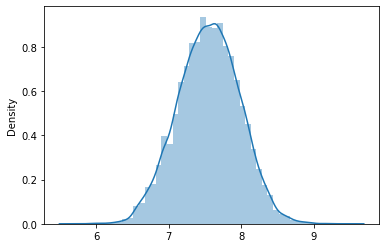

In [37]:
# Após aplicar o log, vamos ver como os dados estão dispostos:
sns.distplot(X_novo)

In [44]:
y_novo = np.log(y)

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

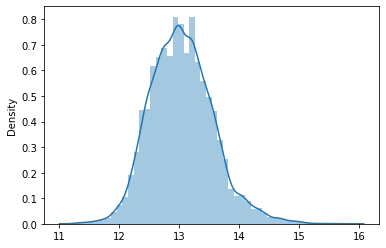

In [45]:
sns.distplot(y_novo)

Observe que os valores viraram uma distribuição normal a partir da função de logaritmo.

In [46]:
regressor = LinearRegression()
regressor.fit(X_novo, y_novo)

LinearRegression()

In [49]:
previsoes = regressor.predict(X_novo)

In [50]:
mean_absolute_error(y_novo, previsoes)

0.314671784942507

In [52]:
r2_score(y_novo, previsoes) # O meu modelo performou com uma melhora, mudando ambas as variáveis para uma distribuição normal

0.45550706431577015

É importante analisar os atributos da base de dados para avaliar se estão com características da distribuição normal, entretanto, caso não obtiver, é possivel transformar para estrutura de distribuição normal e aplicar os modelos de machine learning para obter melhores performances no modelo.